In [1]:
pip install pandas numpy scikit-learn nltk tensorflow keras matplotlib

In [2]:
# Import necessary libraries for data processing, NLP, and machine learning.
# - pandas, numpy: data manipulation and numerical operations
# - nltk: natural language processing tasks
# - sklearn: machine learning algorithms and evaluation metrics
# - BeautifulSoup: web scraping
# - tensorflow, keras: deep learning frameworks
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from bs4 import BeautifulSoup
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from keras import layers, models
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [4]:
# Load the training data
imdb_data = pd.read_csv('IMDB.csv', engine="python", on_bad_lines='skip')

# Check for NaN values in the review column
print("Missing values in 'review' column:", imdb_data['review'].isnull().sum())

# Drop rows with NaN values if any
imdb_data.dropna(subset=['review'], inplace=True)

print(imdb_data.shape)
print(imdb_data.head(10))

Missing values in 'review' column: 0
(50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive


In [5]:
# Download necessary NLTK resources for natural language processing.
# - 'stopwords': a list of common stop words to filter out
# - 'punkt': a tokenizer for splitting text into words
# - 'wordnet': a lexical database for lemmatization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
def pre_process_data(text):
    # Preprocess the input text for NLP tasks.
    # - Initialize tokenizer and stopword list.
    # - Remove HTML tags and text in square brackets.
    # - Clean special characters and digits.
    # - Apply stemming to reduce words to their root form.
    # - Remove stopwords to focus on meaningful words.

    tokenizer = ToktokTokenizer()
    stop_words = set(stopwords.words('english'))

    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Remove text inside square brackets
    text = re.sub(r'\[[^]]*\]', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Stemming
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])

    # Remove stopwords
    tokens = tokenizer.tokenize(text)
    text = ' '.join([token for token in tokens if token.lower() not in stop_words])

    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(pre_process_data)

<ipython-input-6-637342ea77ba>:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [7]:
# Split the dataset into training and testing sets.
# - X: feature data (reviews)
# - y: target labels (sentiments)
# - 20% of the data is reserved for testing, with a fixed random state for reproducibility.
X = imdb_data['review']
y = imdb_data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Convert text data into TF-IDF feature vectors.
# - Create a vectorizer to extract a maximum of 5000 features.
# - Fit and transform the training data, then transform the test data.
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [27]:
#Training the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

In [10]:
#Training the SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

In [28]:
#Evaluate Models
print("Naive Bayes Performance:")
print(classification_report(y_test, nb_pred))

print("SVM Performance:")
print(classification_report(y_test, svm_pred))

Naive Bayes Performance:
              precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

SVM Performance:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [19]:
# Prepare Data for Deep Learning Models
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(imdb_data['review'], imdb_data['sentiment'], test_size=0.2, random_state=42)

tokenizer = keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_dl)

X_train_seq = tokenizer.texts_to_sequences(X_train_dl)
X_test_seq = tokenizer.texts_to_sequences(X_test_dl)

max_length = max(len(x) for x in X_train_seq)
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_length, padding='post')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 352s 559ms/step - accuracy: 0.5025 - loss: 0.6945 - val_accuracy: 0.5184 - val_loss: 0.6924
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 288s 460ms/step - accuracy: 0.4956 - loss: 0.6956 - val_accuracy: 0.4984 - val_loss: 0.6935
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 460ms/step - accuracy: 0.5025 - loss: 0.6944 - val_accuracy: 0.5103 - val_loss: 0.6950
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 451ms/step - accuracy: 0.4968 - loss: 0.6958 - val_accuracy: 0.5022 - val_loss: 0.6940
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 289s 462ms/step - accuracy: 0.4993 - loss: 0.6947 - val_accuracy: 0.5118 - val_loss: 0.6930


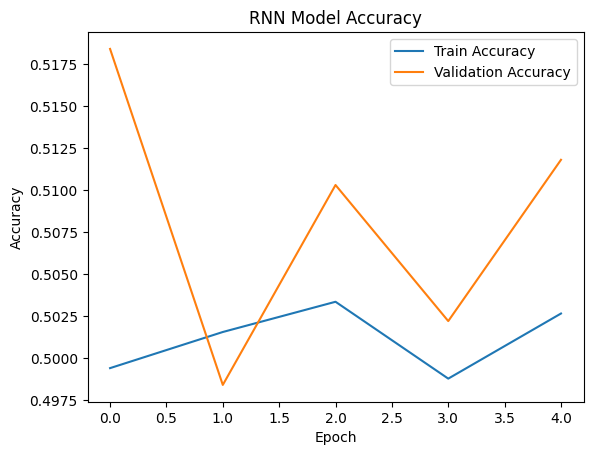

In [20]:
# Training the RNN Model
rnn_model = keras.Sequential([
    layers.Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    layers.SimpleRNN(64),
    layers.Dense(1, activation='sigmoid')
])

# Convert sentiment labels to numerical values
y_train_dl = y_train_dl.map({'positive': 1, 'negative': 0})
y_test_dl = y_test_dl.map({'positive': 1, 'negative': 0})

# Compile the model with a lower learning rate and gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
rnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = rnn_model.fit(X_train_padded, y_train_dl, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test_dl))

# Plot RNN training history
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 371s 589ms/step - accuracy: 0.7249 - loss: 0.5148 - val_accuracy: 0.8851 - val_loss: 0.2774
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 519ms/step - accuracy: 0.9111 - loss: 0.2265 - val_accuracy: 0.8859 - val_loss: 0.2786
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 380s 517ms/step - accuracy: 0.9322 - loss: 0.1806 - val_accuracy: 0.8853 - val_loss: 0.2914
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 381s 515ms/step - accuracy: 0.9502 - loss: 0.1365 - val_accuracy: 0.8787 - val_loss: 0.3404
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 383s 517ms/step - accuracy: 0.9726 - loss: 0.0861 - val_accuracy: 0.8669 - val_loss: 0.4304


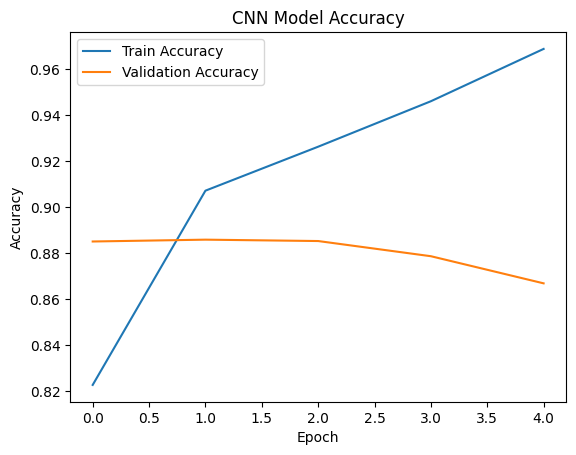

In [22]:
#Training the CNN Model
cnn_model = keras.Sequential([
    layers.Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    layers.Conv1D(128, 5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Assign the output of fit to history_cnn
history_cnn = cnn_model.fit(X_train_padded, y_train_dl, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test_dl))

# Plot CNN training history
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
# Evaluate RNN and CNN Models
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_padded, y_test_dl)
print(f'RNN Model Accuracy: {rnn_accuracy}')

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test_dl)
print(f'CNN Model Accuracy: {cnn_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5042 - loss: 0.6935
RNN Model Accuracy: 0.5117999911308289
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.8709 - loss: 0.4243
CNN Model Accuracy: 0.8669000267982483


In [33]:
# Example Usage: Function to predict sentiment of new reviews
def predict_sentiment(text, model, vectorizer=None):
    sentiment = "Unknown"
    if model in [nb_model, svm_model]:
        text = pre_process_data(text)
        text_tfidf = vectorizer.transform([text])
        prediction = model.predict(text_tfidf)
        sentiment = 'Positive' if prediction[0] == "positive" else 'Negative'
    elif model == 'rnn':
        text_seq = tokenizer.texts_to_sequences([text])
        text_padded = keras.preprocessing.sequence.pad_sequences(text_seq, maxlen=max_length, padding='post')
        prediction = (rnn_model.predict(text_padded) > 0.5).astype("int32")
        sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
    elif model == 'cnn':
        text_seq = tokenizer.texts_to_sequences([text])
        text_padded = keras.preprocessing.sequence.pad_sequences(text_seq, maxlen=max_length, padding='post')
        prediction = (cnn_model.predict(text_padded) > 0.5).astype("int32")
        sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
    return sentiment

# Example usage of the predict_sentiment function
new_review = """ved Finding Nemo! It's such a heartwarming story about family and friendship,
with beautiful animation and fun characters. Perfect for all ages!"""
print("Sentiment (Naive Bayes):", predict_sentiment(new_review, nb_model, vectorizer))
print("Sentiment (SVM):", predict_sentiment(new_review, svm_model, vectorizer))
print("Sentiment (RNN):", predict_sentiment(new_review, 'rnn'))
print("Sentiment (CNN):", predict_sentiment(new_review, 'cnn'))

Sentiment (Naive Bayes): Positive
Sentiment (SVM): Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Sentiment (RNN): Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Sentiment (CNN): Positive
